In [1]:
# Import the python package
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv("train.csv")
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
# Infomation of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [4]:
# Describe the dataframe
df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [5]:
int_float_columns = [
    "Length",
    "Diameter",
    "Height",
    "Weight",
    "Shucked Weight",
    "Viscera Weight",
    "Shell Weight",
    "Age",
]

df_int_float = df[int_float_columns]

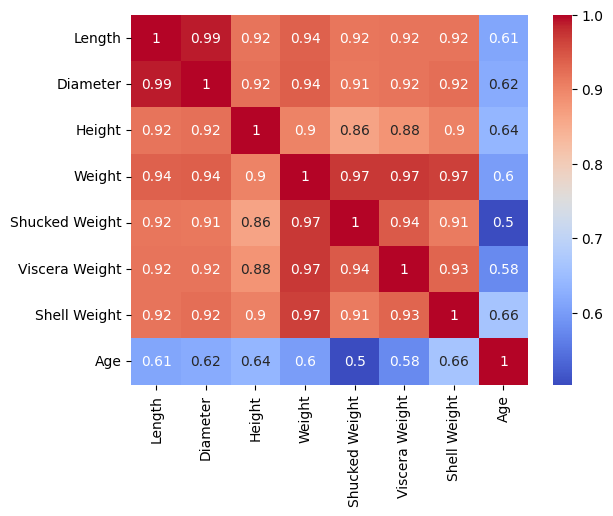

In [6]:
# Calculate correlation matrix
correlation = df_int_float.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation, annot=True, cmap="coolwarm")

# Show the plot
plt.show()

In [7]:
# Select top 5 columns with the highest correlation to the target column
top_corr_features = correlation["Age"].drop("Age").nlargest(10)

# Print the top 5 column names with highest correlation
print(top_corr_features)

Shell Weight      0.663473
Height            0.638067
Diameter          0.621256
Length            0.612843
Weight            0.601195
Viscera Weight    0.576808
Shucked Weight    0.503320
Name: Age, dtype: float64


In [8]:
# Selection of input and output columns
X = df[["Length", "Diameter", "Height", "Weight", "Shell Weight"]]
y = df["Age"]

In [9]:
# Split the dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature data
X_train = scaler.fit_transform(X_train)

In [11]:
# Create a Decision Tree Regression model
model = DecisionTreeRegressor(max_depth=7, min_samples_leaf=8, min_samples_split=20)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 23.870236148625096


/Users/ujjawalpoudel/Downloads/Code/personal/machine_learning_revision/machine_learning_venv/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [12]:
# Read a test dataset
df_test = pd.read_csv("test.csv")
df_test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [13]:
# Selection of input and output columns
X_test_final = df_test[["Length", "Diameter", "Height", "Weight", "Shell Weight"]]

In [14]:
# Make predictions on the test data
y_pred_final = model.predict(X_test_final)

/Users/ujjawalpoudel/Downloads/Code/personal/machine_learning_revision/machine_learning_venv/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [15]:
# Add Age column
df_test["Age"] = y_pred_final.tolist()
df_test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,13.961661
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,13.961661
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,13.961661
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,13.961661
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,13.961661


In [16]:
# Save the DataFrame to a CSV file
df_test[["id", "Age"]].to_csv("sample_submission.csv", index=False)